In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sls
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv("laptopData.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [9]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
df = df.dropna()
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [42]:
corr_matrix=df.corr()
corr_matrix

C:\Users\user\AppData\Local\Temp\ipykernel_1840\363827394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


,Unnamed: 0,Inches,Price,ram_num
Unnamed: 0,1.000000,-0.088147,0.065403,-0.041152
Inches,-0.088147,1.000000,0.032713,0.139396
Price,0.065403,0.032713,1.000000,0.685648
ram_num,-0.041152,0.139396,0.685648,1.000000


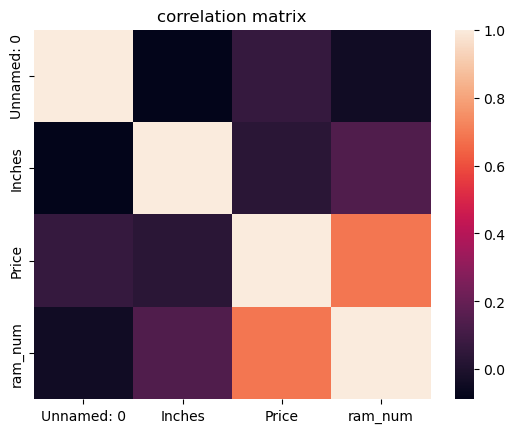

In [43]:
sls.heatmap(corr_matrix)
plt.title("correlation matrix");

In [24]:
df.Inches =df.Inches.replace("?",0)

In [40]:
df["ram_num"]=df.Ram.str.extract(r"(\d+)")
df.ram_num = df.ram_num.astype(int)

In [29]:
df.Inches =df.Inches.astype(float)

In [41]:
df.dtypes

Unnamed: 0          float64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
ram_num               int32
dtype: object

In [47]:
to_drop = ["Unnamed: 0"]

In [48]:
df.drop(columns=to_drop, inplace = True)

In [59]:
df.select_dtypes("object").nunique()

Company              19
TypeName              6
ScreenResolution     40
Cpu                 118
Ram                  10
Memory               40
Gpu                 110
OpSys                 9
Weight              189
dtype: int64

In [50]:
x=df.drop(columns=["Price"])
y= np.log1p(df.Price)

In [52]:
y

0       11.175769
1       10.776798
2       10.329964
3       11.814483
4       11.473111
          ...    
1298    10.433929
1299    11.288127
1300     9.409365
1301    10.614153
1302     9.886409
Name: Price, Length: 1273, dtype: float64

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [54]:
y_mean = int(y_train.mean())
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline

[10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,


In [55]:
mae_baseline = mean_absolute_error(np.expm1( y_train),np.expm1(y_pred_baseline))
mae_baseline

38446.4392208648

In [56]:
rmse = mean_squared_error(np.expm1(y_train), np.expm1(y_pred_baseline), squared = False)

In [57]:
rmse

52581.495477707314

In [58]:
np.expm1(0.7884585735816984)

1.2000026690799612

In [60]:
np.expm1(1.107238797647524)

2.025991473595407

In [61]:
model = make_pipeline(OneHotEncoder(use_cat_names = True), Ridge())

In [62]:
model.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Company', 'TypeName', 'ScreenResolution',
                                     'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
                                     'Weight'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

In [63]:
y_pred=model.predict(x_train)

In [64]:
mae_train = np.expm1( mean_absolute_error(y_train,y_pred))
mae_train

0.11472366949835593

In [65]:
mae_train = mean_absolute_error(np.expm1(y_train),np.expm1(y_pred))
mae_train

6380.760280108407

In [66]:
y_test_pred=model.predict(x_test)
y_test_pred

array([11.00589142, 11.38203903, 10.42638818, 10.19855109, 10.24345902,
       11.00382084, 11.42401396, 10.54592322, 10.47468438, 11.65414169,
        9.64528905, 11.34273272, 10.96935214, 11.23052513, 11.02034724,
       11.09066068,  9.72671116, 11.21286886, 10.99255369, 10.83902173,
       11.61650824, 10.09427115, 10.64896557,  9.69404646, 10.83512775,
       10.90348835, 10.92436595,  9.98216759, 11.00676458, 10.82997207,
       10.92752396, 10.66694667, 10.42630767, 10.88312746, 11.0616694 ,
       10.85773483, 10.99093173, 10.41964933, 10.04455307, 10.39990763,
       11.22505009, 10.95426741,  9.81387292, 11.54985957, 10.32028121,
       10.54522606, 10.90088691,  9.84372833,  9.72267606, 10.85660411,
       10.17813069, 11.35531126, 10.92382123, 10.47900157,  9.58435434,
       12.27135011,  9.47212964,  9.69404646, 12.03788117, 11.48565411,
       11.69666987, 10.1745942 , 10.19855109,  9.74212782, 10.19110992,
       11.06734815, 11.41506465, 11.17744203, 10.73649822, 11.22